This notebook runs benchmarking for image registraion on VoltRon paper.  

Tools:  
* warpy
* GreedyFHist - a registration algorithm based on the Greedy registration tool
* MIIT (same paper)
* 

Possible registration **approaches** to benchmark:
* enhanced correlation coefficient (ECC) maximization  
* Mutual information
* BRISK
* ORB (ours)
* SIFT (ours)  
* All available in Python

Deep learning approaches to try:
* https://github.com/voxelmorph/voxelmorph
  

Metrics:  
* Accuracy
* speed. If we only have limited datasets, we can also scale those for comparison.

Papers:
* https://github.com/JEFworks-Lab/STalign
* https://github.com/InsightSoftwareConsortium/ITKElastix/  
Since https://github.com/NHPatterson/wsireg is based on it, we just use Elastix.  
* https://www.biorxiv.org/content/10.1101/2023.11.27.568931v1.supplementary-material  
Tool is MetaAlign3D - Do not provide code.  
Statistical measures of alignment and fit quality, including enhanced correlation coefficient (ECC) for geometric transformation, structural similarity index measure(SSIM) were used to compare image similarities, and mean squared error (MSE).
* Also look at: https://www.researchgate.net/publication/371137177_The_ACROBAT_2022_Challenge_Automatic_Registration_Of_Breast_Cancer_Tissue/link/647f333279a7223765139995/download?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uIn19


Datasets:  
* PLEASE FILL


In [1]:
import cv2
import tifffile as tif
from skimage import io, color
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

In [2]:
import itk
from STalign import STalign

In [3]:
def show_images(source, destination, registered):
    print(source.shape, destination.shape, registered.shape)
    fig, ax = plt.subplots(1, 3, figsize=(10,20))
    ax[0].imshow(source)
    ax[1].imshow(destination)
    ax[2].imshow(registered)
    
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')

In [4]:
path = '/home/ella/work/akalin_assay_coregistration/data/'
path1 = os.path.join(path, 'morphology.png')
path2 = os.path.join(path, 'tissue_lowres_image.png')

im1 = io.imread(path1)
im2 = (color.rgb2gray(io.imread(path2))*255).astype(np.uint8)

print(im1.shape, im2.shape)

(402, 553) (543, 600)


### ITK Elastix

In [5]:
im1_itk = itk.image_from_array(im1)
im2_itk = itk.image_from_array(im2)

im1_itk = itk.cast_image_filter(im1_itk, ttype=(type(im1_itk), itk.Image[itk.SS, 2]))
im2_itk = itk.cast_image_filter(im2_itk, ttype=(type(im2_itk), itk.Image[itk.SS, 2]))

##### Default params

(543, 600) (402, 553) (402, 553)


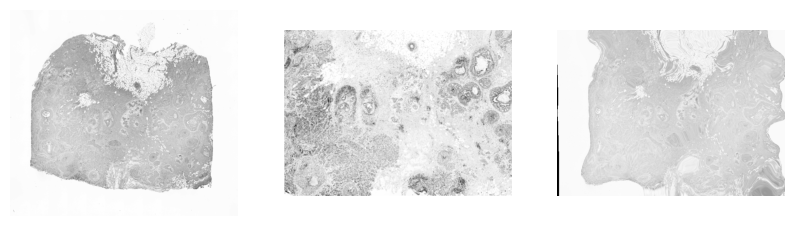

In [6]:
registered_image, params = itk.elastix_registration_method(fixed_image=im1_itk, 
                                                           moving_image=im2_itk)

show_images(im2_itk, im1_itk, registered_image)

(402, 553) (543, 600) (543, 600)


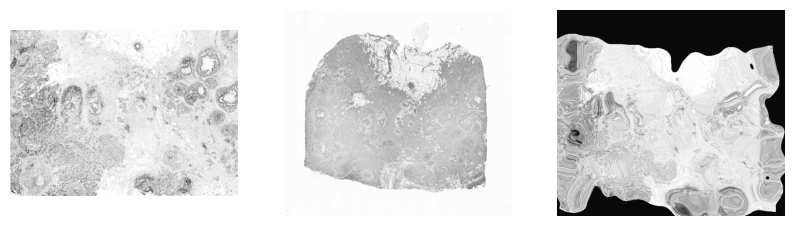

In [7]:
registered_image, params = itk.elastix_registration_method(fixed_image=im2_itk, 
                                                           moving_image=im1_itk)

show_images(im1_itk, im2_itk, registered_image)

### With params

In [8]:
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

(402, 553) (543, 600) (543, 600)


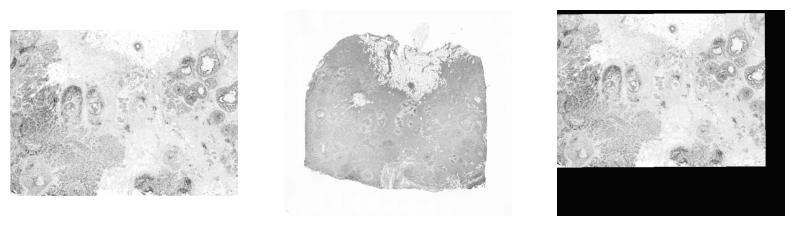

In [9]:
registered_image, result_transform_parameters = itk.elastix_registration_method(
    im2_itk, im1_itk,
    parameter_object=parameter_object,
    log_to_console=False)

show_images(im1_itk, im2_itk, registered_image)

In [ ]:
registered_image, result_transform_parameters = itk.elastix_registration_method(
    im1_itk, im2_itk,
    parameter_object=parameter_object,
    log_to_console=False)

show_images(im2_itk, im1_itk, registered_image)

##### crop image image so that they are more alike

In [ ]:
im2_crop = im2_itk[150:450, 110:500]
plt.imshow(im2_crop)

In [ ]:
registered_image, result_transform_parameters = itk.elastix_registration_method(
    im1_itk, im2_crop,
    parameter_object=parameter_object,
    log_to_console=False)

show_images(im2_crop, im1_itk, registered_image)

In [ ]:
registered_image, result_transform_parameters = itk.elastix_registration_method(
    im2_crop, im1_itk,
    parameter_object=parameter_object,
    log_to_console=False)

show_images(im1_itk, im2_crop, registered_image)

### STalign

STalign relies on an interative gradient descent to align these two images. This can be somewhat slow. We manually created 3 points that visually mark similar landmarks across the two datasets that we will use to initialize a simple affine alignment from the landmark points.

In [ ]:
im1 = io.imread(path1)
im2 = io.imread(path2)
print(np.min(im1), np.max(im1), im1.shape)
print(np.min(im2), np.max(im2), im2.shape)

In [ ]:
im2_norm = STalign.normalize(im2)
im2_morn_T = Inorm2.transpose(2,0,1)

In [ ]:
im1_3d = np.vstack((im1, im1, im1))
im1_3d_norm = STalign.normalize(J)